In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#read csv containing Default Credit Card Data
cc_data = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
#examine the data
cc_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
cc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
#rename columns to more convinent names
cc_data.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
cc_data.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)

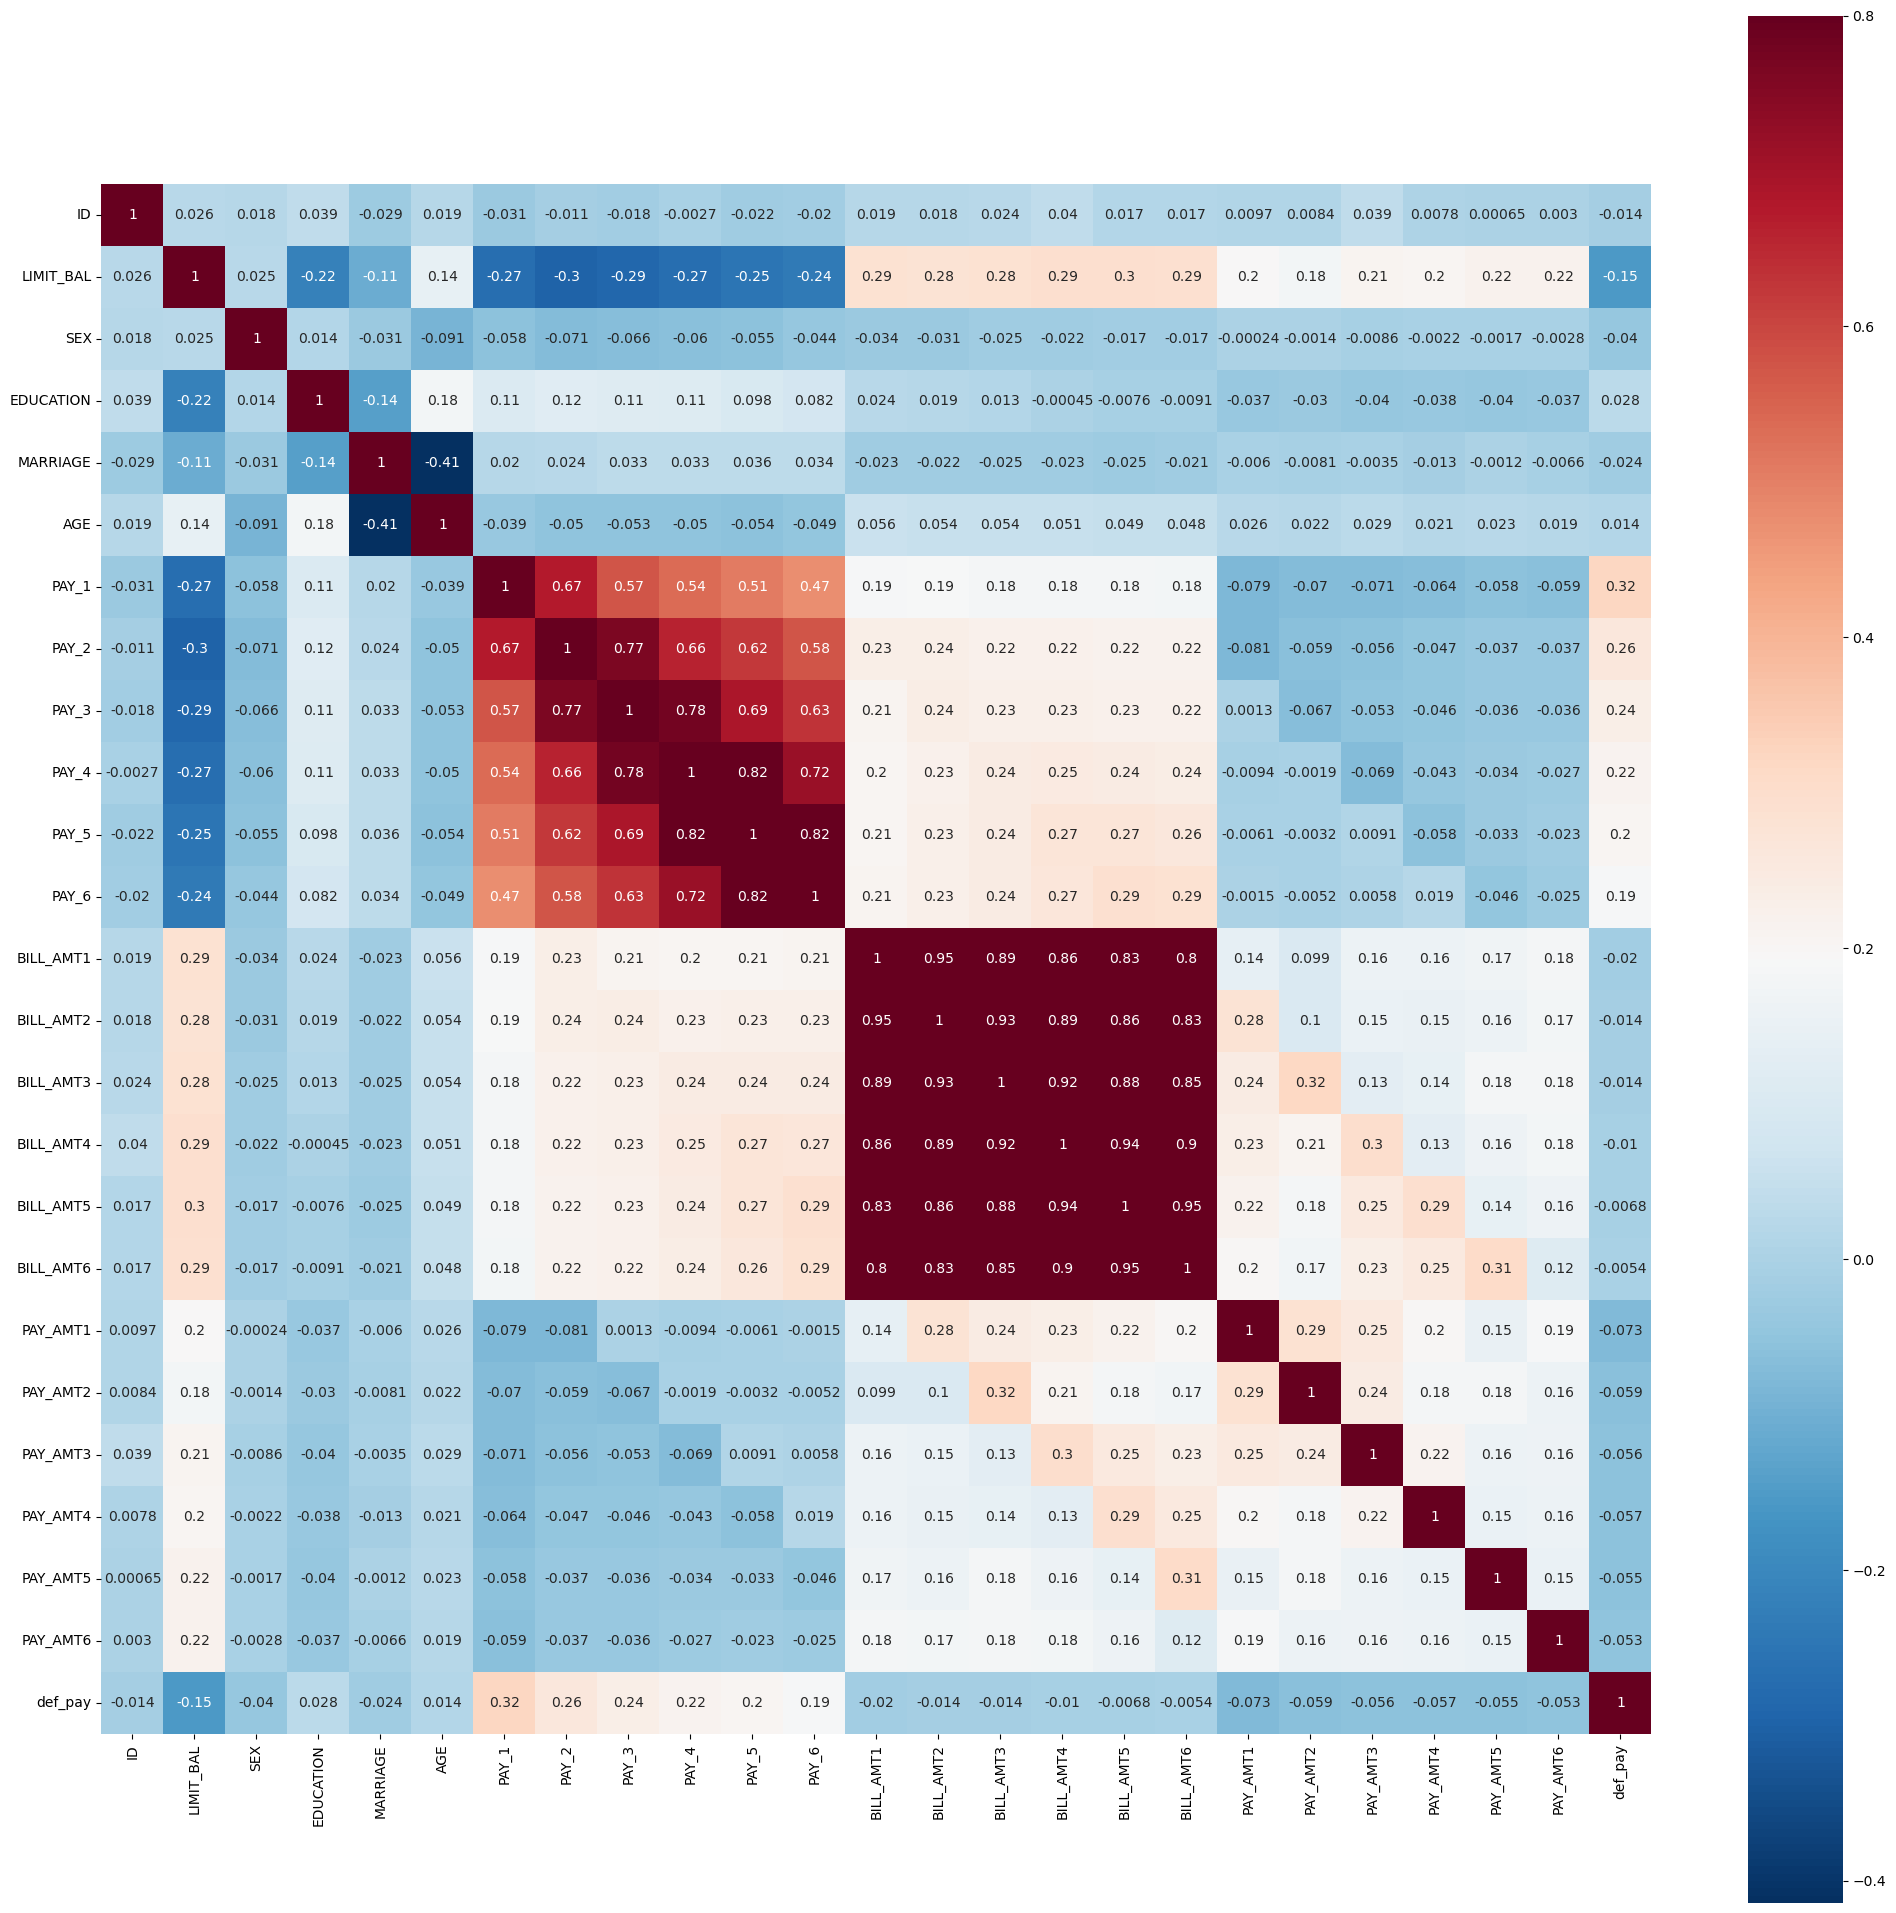

In [8]:
#visualize the corralation between variables
corr = cc_data.corr()
plt.figure(figsize=(25,25), dpi=100)
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmax=.8, square=True, cbar=True)
plt.show()

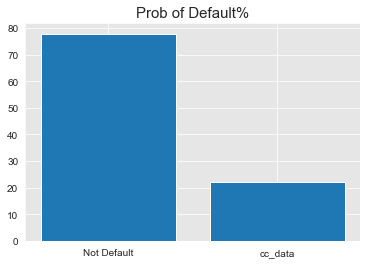

In [9]:
#plot the probability of default on payment
total_records = cc_data.shape[0]
total_defaulters = cc_data[cc_data['def_pay'] == 1].shape[0]
not_defaulters = total_records - total_defaulters
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.bar(['Not Default', 'cc_data'], [(not_defaulters/total_records)*100, (total_defaulters/total_records)*100])
plt.title("Prob of Default%", fontsize=15)
plt.show()

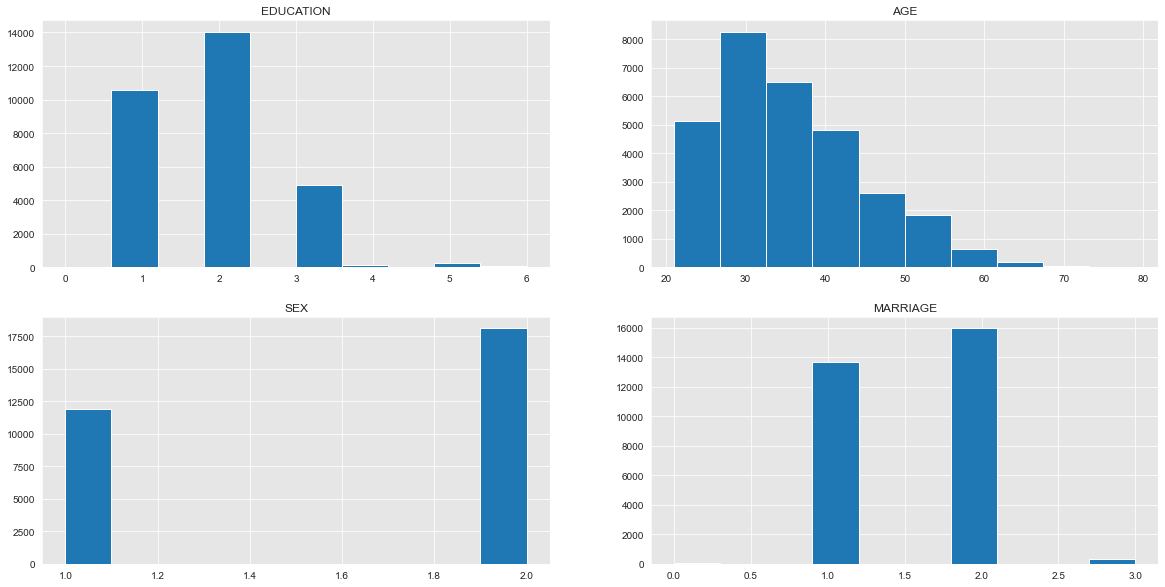

In [10]:
#visulize the demographic data
fig, ax = plt.subplots(2,2, figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax[0,0].hist(cc_data.EDUCATION)
ax[0,0].set_title('EDUCATION')
ax[0,1].hist(cc_data.AGE)
ax[0,1].set_title('AGE')
ax[1,0].hist(cc_data.SEX)
ax[1,0].set_title('SEX')
ax[1,1].hist(cc_data.MARRIAGE)
ax[1,1].set_title('MARRIAGE')
plt.show()

In [11]:
#convert categorical variables to one-hot encoded variables
def one_hot_encoding(df, columns):
    df = df.copy()
    for col, pref in columns.items():
        dummy = pd.get_dummies(df[col], prefix=pref)
        df = pd.concat([df, dummy], axis=1)
        df = df.drop(col, axis=1)
    return df

#preprocess the data
def preprocess_input(df):
    df = df.copy()
    df = df.drop('ID', axis=1)
    df = one_hot_encoding(df, {'EDUCATION':'EDU_', 'MARRIAGE':'MAR_'})
    x = df.drop('def_pay', axis=1).copy()
    y = df['def_pay'].copy()
    #scale the data
    x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns)
    return x,y

In [12]:
x, y = preprocess_input(cc_data)

In [13]:
x

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU__0,EDU__1,EDU__2,EDU__3,EDU__4,EDU__5,EDU__6,MAR__0,MAR__1,MAR__2,MAR__3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [14]:
#split the data into train and test
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
#function to train and evaluate different models
def models_score(models, x_tr, y_tr, x_ts, y_ts):
    for model in models:
        model.fit(x_tr, y_tr)
        print(model.__class__.__name__, f"Model Score: {np.round(model.score(x_ts, y_ts)*100)}%")

In [16]:
model = [LinearRegression(), LogisticRegression(), SVC(), tree.DecisionTreeClassifier(), KNeighborsClassifier()]

In [17]:
models_score(model, x_tr, y_tr, x_ts, y_ts)

LinearRegression Model Score: 12.0%
LogisticRegression Model Score: 81.0%
SVC Model Score: 82.0%
DecisionTreeClassifier Model Score: 72.0%
KNeighborsClassifier Model Score: 80.0%


In [18]:
#deep learning models
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(x_tr,y_tr, epochs=10, validation_data=(x_ts, y_ts))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/10


2022-06-16 20:31:49.960801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-16 20:31:49.960983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-16 20:31:50.073717: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 12/750 [..............................] - ETA: 3s - loss: 0.6662 - accuracy: 0.6380  

2022-06-16 20:31:50.367017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


746/750 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8053

2022-06-16 20:31:54.273078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 5s 6ms/step - loss: 0.4664 - accuracy: 0.8054 - val_loss: 0.4421 - val_accuracy: 0.8142
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4384 - accuracy: 0.8180 - val_loss: 0.4388 - val_accuracy: 0.8170
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4321 - accuracy: 0.8198 - val_loss: 0.4383 - val_accuracy: 0.8168
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4279 - accuracy: 0.8230 - val_loss: 0.4347 - val_accuracy: 0.8175
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4249 - accuracy: 0.8223 - val_loss: 0.4355 - val_accuracy: 0.8152
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4225 - accuracy: 0.8223 - val_loss: 0.4375 - val_accuracy: 0.8163
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4213 - accuracy: 0.8235 - val_loss: 0.4381 - val_accuracy: 0.8145
Epoch 8/10
750/75